In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tqdm
import os
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
from sklearn.linear_model import LogisticRegression

In [2]:
path='SentenceCorpus/labeled_articles/'
train=pd.DataFrame()
targets=['AIMX','OWNX','MISC','CONT','BASE']
for name in os.listdir(path):
    if '.txt' in name:
        print(name)
        f=open(path+name,'r')
        sentences=[]
        labels=[]
        names=[]
        for line in f:
            if '## abstract ##' not in line and '## introduction ##' not in line:
                # name of the label has length 4
                line=line.replace('\t',' ')
                line=line.replace('--',' ')
                label=line[0:4]
                content=line[5:-1]
                for target in targets:
                    if target in content:
                        content=content.replace(target,'')
            
                sentences.append(content)
                labels.append(label)
                names.append(name)
            
        info=pd.DataFrame()
        info['DocumentName']=names
        info['Sentences']=pd.Series(sentences)
        info['Label']=pd.Series(labels)
        
        train=pd.concat([train,info],ignore_index=True)

arxiv_annotate10_7_1.txt
arxiv_annotate10_7_2.txt
arxiv_annotate10_7_3.txt
arxiv_annotate1_13_1.txt
arxiv_annotate1_13_2.txt
arxiv_annotate1_13_3.txt
arxiv_annotate2_66_1.txt
arxiv_annotate2_66_2.txt
arxiv_annotate2_66_3.txt
arxiv_annotate3_80_1.txt
arxiv_annotate3_80_2.txt
arxiv_annotate3_80_3.txt
arxiv_annotate4_168_1.txt
arxiv_annotate4_168_2.txt
arxiv_annotate4_168_3.txt
arxiv_annotate5_240_1.txt
arxiv_annotate5_240_2.txt
arxiv_annotate5_240_3.txt
arxiv_annotate6_52_1.txt
arxiv_annotate6_52_2.txt
arxiv_annotate6_52_3.txt
arxiv_annotate7_268_1.txt
arxiv_annotate7_268_2.txt
arxiv_annotate7_268_3.txt
arxiv_annotate8_81_1.txt
arxiv_annotate8_81_2.txt
arxiv_annotate8_81_3.txt
arxiv_annotate9_279_1.txt
arxiv_annotate9_279_2.txt
arxiv_annotate9_279_3.txt
jdm_annotate10_210_1.txt
jdm_annotate10_210_2.txt
jdm_annotate10_210_3.txt
jdm_annotate1_103_1.txt
jdm_annotate1_103_2.txt
jdm_annotate1_103_3.txt
jdm_annotate2_107_1.txt
jdm_annotate2_107_2.txt
jdm_annotate2_107_3.txt
jdm_annotate3_120_1

In [3]:
print(train.shape)
train.head(10)

(3117, 3)


,DocumentName,Sentences,Label
0,arxiv_annotate10_7_1.txt,The Minimum Description Length principle for o...,MISC
1,arxiv_annotate10_7_1.txt,"If the underlying model class is discrete, the...",MISC
2,arxiv_annotate10_7_1.txt,"For MDL, in general one can only have loss bou...",MISC
3,arxiv_annotate10_7_1.txt,We show that this is even the case if the mode...,AIMX
4,arxiv_annotate10_7_1.txt,We derive a new upper bound on the prediction ...,OWNX
5,arxiv_annotate10_7_1.txt,This implies a small bound (comparable to the ...,OWNX
6,arxiv_annotate10_7_1.txt,We discuss the application to Machine Learning...,OWNX
7,arxiv_annotate10_7_1.txt,"``Bayes mixture"", ``Solomonoff induction"", ``m...",MISC
8,arxiv_annotate10_7_1.txt,"In many cases however, the Bayes mixture is co...",CONT
9,arxiv_annotate10_7_1.txt,The MDL or MAP (maximum a posteriori) estimato...,MISC


In [4]:
train.to_csv("train.tsv",sep='\t',index=False)
print("Done")

Done


C:\Users\WIN 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

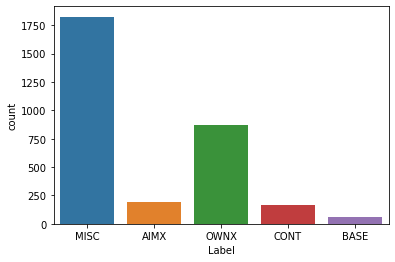

In [5]:
sns.countplot(train.Label)

In [6]:
f=open('SentenceCorpus/word_lists/stopwords.txt','r')
stop_words=[]
for line in f:
    stop_words.append(line[:-1])
    
def cleaner(x):
    
    x=re.sub('[^a-zA-Z]',' ',x)
    x=x.lower()
    k=[]
    for word in x.split():
        if word in stop_words:
            None
        else:
            k.append(word)
    
    x=" ".join(k)

    
    return " ".join(x.split())

In [7]:
train['Sentences']=train['Sentences'].apply(cleaner)
print(train.shape)
train.head()

(3117, 3)


,DocumentName,Sentences,Label
0,arxiv_annotate10_7_1.txt,minimum description length principle online se...,MISC
1,arxiv_annotate10_7_1.txt,if underlying model class discrete then total ...,MISC
2,arxiv_annotate10_7_1.txt,mdl general one only loss bounds finite but ex...,MISC
3,arxiv_annotate10_7_1.txt,we show this even case if model class contains...,AIMX
4,arxiv_annotate10_7_1.txt,we derive new upper bound prediction error cou...,OWNX


In [8]:
idx=280
display(train.loc[(train['DocumentName']==train.iloc[idx,0]) & (train['Sentences']==train.iloc[idx,1]) &
                  (train['Label']==train.iloc[idx,2])])

p=train[['Sentences','Label']]
print(train[p.duplicated()].shape)

,DocumentName,Sentences,Label
280,arxiv_annotate1_13_3.txt,topology modeling knowledge types mandatory au...,MISC


(1749, 3)


In [9]:
corpus=set()
for line in train.Sentences:
    for word in line.split():
        corpus.add(word)

corpus=list(corpus)
corpus.sort()
print("The Vocabulary size is",len(corpus))

The Vocabulary size is 3938


In [10]:
vectorizer=CountVectorizer(tokenizer=None,preprocessor=None,max_features=1000,stop_words=None)
vectorizer.fit(train.Sentences.values)

CountVectorizer(max_features=1000)

In [11]:
X=train.iloc[:,1].values
y=train.iloc[:,2]

# transformer
encoder={name:idx for idx,name in enumerate(y.unique())}

decoder={idx:name for idx,name in enumerate(y.unique())}

y=y.map(encoder).values
X=vectorizer.transform(X)


print("Training Shape",X.shape,y.shape)

Training Shape (3117, 1000) (3117,)


In [12]:
X_train,X_val,y_train,y_val=train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)

(2493, 1000) (2493,)
(624, 1000) (624,)


In [13]:
clf=MultinomialNB()
clf.fit(X_train,y_train)
print("Training Score",clf.score(X_train,y_train))
print("Validation SCore",clf.score(X_val,y_val))
print("Training F1 score",f1_score(y_train,clf.predict(X_train),average='macro'))
print("Validation F1 score",f1_score(y_val,clf.predict(X_val),average='macro'))

Training Score 0.8247091857200161
Validation SCore 0.7403846153846154
Training F1 score 0.7404537949660075
Validation F1 score 0.591998822309755


In [14]:
lr=LogisticRegression(penalty='l1',solver='liblinear',C=6,class_weight='balanced')
lr.fit(X_train,y_train)
print("Training Score",lr.score(X_train,y_train))
print("Validation SCore",lr.score(X_val,y_val))
print("Training F1 score",f1_score(y_train,lr.predict(X_train),average='macro'))
print("Validation F1 score",f1_score(y_val,lr.predict(X_val),average='macro'))

Training Score 0.9113517849979944
Validation SCore 0.8301282051282052
Training F1 score 0.854621550176376
Validation F1 score 0.7241386614830687


In [15]:
lr=LogisticRegression(penalty='l2',solver='liblinear',C=2,class_weight='balanced')
lr.fit(X_train,y_train)
print("Training Score",lr.score(X_train,y_train))
print("Validation SCore",lr.score(X_val,y_val))
print("Training F1 score",f1_score(y_train,lr.predict(X_train),average='macro'))
print("Validation F1 score",f1_score(y_val,lr.predict(X_val),average='macro'))

Training Score 0.9101484155635781
Validation SCore 0.8381410256410257
Training F1 score 0.853908499408092
Validation F1 score 0.727769804621224


In [16]:
confusion_matrix(y_val,lr.predict(X_val))

array([[320,   1,  22,  20,   2],
       [  0,  31,   8,   0,   0],
       [ 13,  12, 143,   2,   4],
       [ 10,   1,   3,  20,   0],
       [  0,   1,   2,   0,   9]], dtype=int64)

In [17]:
np.sum(y_val==0)

365

## PREPROCESSING TEST DATA

In [18]:
test=pd.DataFrame()
p = "SentenceCorpus/unlabeled_articles/"
unlabelDoc=os.listdir(p)
for folder in unlabelDoc:
    listfiles=os.listdir(p+folder)
    for filename in tqdm.tqdm(listfiles):
        path = p+folder+"/"+filename
        file = open(path, "r",errors='ignore')
        sentences=[]
        names=[]
        for line in file:
            if '## abstract ##' not in line and '## introduction ##' not in line:
                # name of the label has length 4
                line=line.replace('\t',' ')
                line=line.replace('--',' ')
                
                sentences.append(line)
                names.append(folder+" "+filename)
        
        info=pd.DataFrame()
        info['DocumentName']=names
        info['Sentences']=pd.Series(sentences)
        test=pd.concat([test,info],ignore_index=True)

100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:02<00:00, 123.29it/s]


In [19]:
print(test.shape)
test.head()

(35271, 2)


,DocumentName,Sentences
0,arxiv_unlabeled 1.txt,Fitness functions based on test cases are very...
1,arxiv_unlabeled 1.txt,This process can be assimilated to a learning ...
2,arxiv_unlabeled 1.txt,This paper is an investigation on two methods ...
3,arxiv_unlabeled 1.txt,Results using GP in a binary classification se...
4,arxiv_unlabeled 1.txt,GP is particularly suited for problems that ca...


In [20]:
test['Sentences']=test['Sentences'].apply(cleaner)
test.head()

,DocumentName,Sentences
0,arxiv_unlabeled 1.txt,fitness functions based test cases very common...
1,arxiv_unlabeled 1.txt,this process assimilated learning task inferen...
2,arxiv_unlabeled 1.txt,this paper investigation two methods improve g...
3,arxiv_unlabeled 1.txt,results using gp binary classification setup s...
4,arxiv_unlabeled 1.txt,gp particularly suited problems assimilated le...


(35271,)


C:\Users\WIN 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


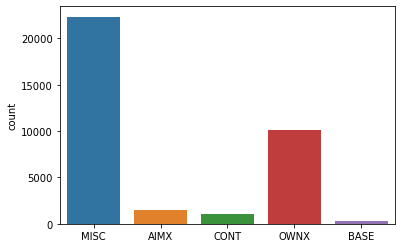

In [21]:
X_test=vectorizer.transform(test['Sentences'].values)
y_test=lr.predict(X_test)
y_test=pd.Series(y_test).map(decoder).values
print(y_test.shape)
sns.countplot(y_test)
plt.show()

(35271,)


C:\Users\WIN 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


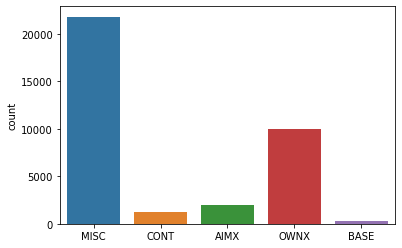

In [22]:
y_test_nb=clf.predict(X_test)
y_test_nb=pd.Series(y_test_nb).map(decoder).values
print(y_test_nb.shape)
sns.countplot(y_test_nb)
plt.show()

## WRITING THE TEST DATA TO FILE

In [23]:
path_prev = None
file = None
for i,sentence in tqdm.tqdm(enumerate(test['Sentences'])):
    pred=y_test[i]
    folder,filename=test.iloc[i,0].split()
    directory="SentenceCorpus/"+folder+"_predictions"
    path=directory+"/"+filename
    if not os.path.exists(directory):
        os.makedirs(directory)
    if(path_prev is None or path_prev != path):
        if(not file is None):
            file.close()
        file = open(path, 'w+')
        path_prev = path
    file.write(str(pred) + "--: " + sentence+"\n")
file.close()

35271it [00:15, 2229.11it/s]
